In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/HomeWork3/leaves_data_homework3.csv")

X = data[['Width', 'Length']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Question 1

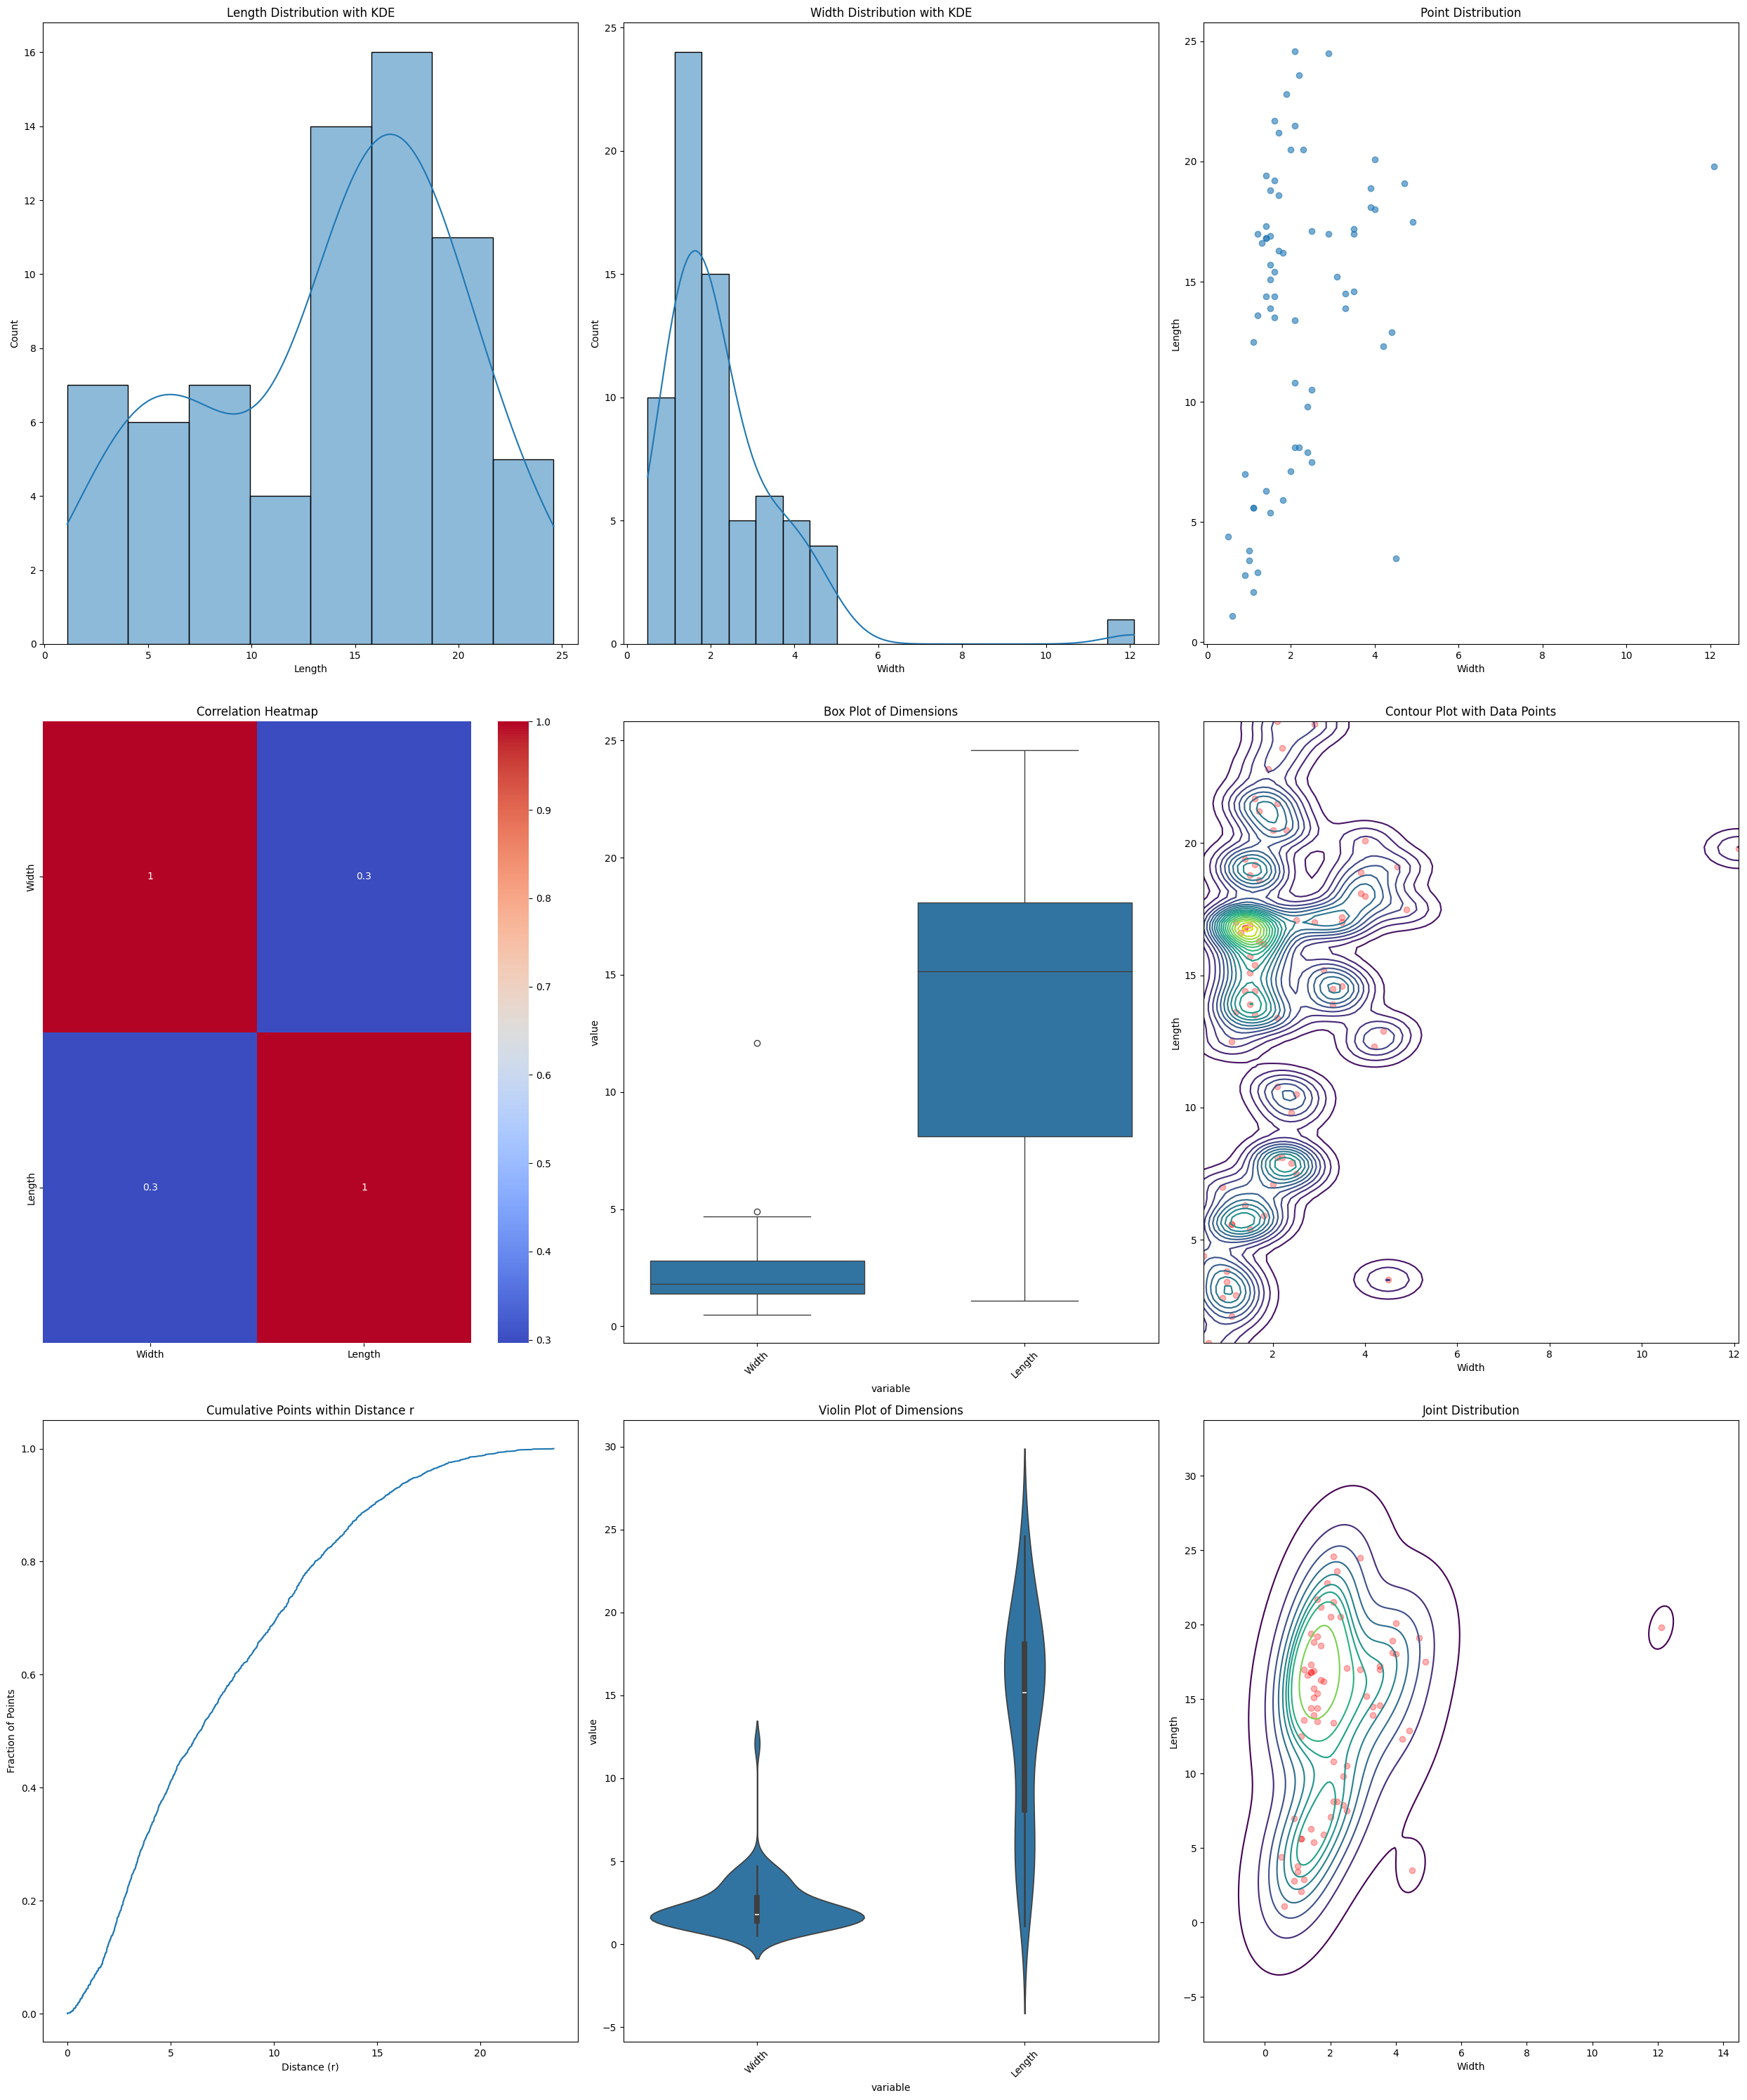


Summary Statistics:
           Width     Length
count  70.000000  70.000000
mean    2.290000  13.792857
std     1.602729   6.165573
min     0.500000   1.100000
25%     1.400000   8.100000
50%     1.800000  15.150000
75%     2.800000  18.075000
max    12.100000  24.600000

Width/Length Ratio Statistics:
count    70.000000
mean      0.206398
std       0.175692
min       0.070588
25%       0.095962
50%       0.182516
75%       0.255963
max       1.285714
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import KernelDensity
import networkx as nx
from math import pi

# Load data
data = pd.read_csv("https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/HomeWork3/leaves_data_homework3.csv")

# Create a larger figure with multiple subplots
plt.figure(figsize=(25, 30))

# 1. Histogram with KDE
plt.subplot(3, 3, 1)
sns.histplot(data=data, x='Length', kde=True)
plt.title('Length Distribution with KDE')
plt.xlabel('Length')
plt.ylabel('Count')

plt.subplot(3, 3, 2)
sns.histplot(data=data, x='Width', kde=True)
plt.title('Width Distribution with KDE')
plt.xlabel('Width')
plt.ylabel('Count')

# 2. Scatter plot with regression line
plt.subplot(3, 3, 3)
plt.scatter(data['Width'], data['Length'], alpha=0.6)
plt.title('Point Distribution')
plt.xlabel('Width')
plt.ylabel('Length')

# 4. Heatmap of correlation matrix
plt.subplot(3, 3, 4)
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 5. Box plot
plt.subplot(3, 3, 5)
data_melted = pd.melt(data)
sns.boxplot(data=data_melted, x='variable', y='value')
plt.title('Box Plot of Dimensions')
plt.xticks(rotation=45)

# 6. Contour plot
plt.subplot(3, 3, 6)
x = np.linspace(data['Width'].min(), data['Width'].max(), 100)
y = np.linspace(data['Length'].min(), data['Length'].max(), 100)
X, Y = np.meshgrid(x, y)
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([data['Width'], data['Length']])
kernel = KernelDensity(bandwidth=0.5)
kernel.fit(values.T)
Z = np.exp(kernel.score_samples(positions.T))
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.scatter(data['Width'], data['Length'], c='red', alpha=0.3)
plt.title('Contour Plot with Data Points')
plt.xlabel('Width')
plt.ylabel('Length')


# 8. Cumulative Distance Plot
plt.subplot(3, 3, 7)
distances = pdist(data)
sorted_dist = np.sort(distances)
cumulative = np.arange(1, len(sorted_dist) + 1) / len(sorted_dist)
plt.plot(sorted_dist, cumulative)
plt.title('Cumulative Points within Distance r')
plt.xlabel('Distance (r)')
plt.ylabel('Fraction of Points')


# 11. Violin Plot
plt.subplot(3, 3, 8)
sns.violinplot(data=data_melted, x='variable', y='value')
plt.title('Violin Plot of Dimensions')
plt.xticks(rotation=45)

# 12. Joint Plot
plt.subplot(3, 3, 9)
sns.kdeplot(data=data, x='Width', y='Length', cmap='viridis')
plt.scatter(data['Width'], data['Length'], c='red', alpha=0.3)
plt.title('Joint Distribution')

plt.tight_layout()
plt.show()

# Calculate and print summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Calculate additional metrics
width_length_ratio = data['Width'] / data['Length']
print("\nWidth/Length Ratio Statistics:")
print(width_length_ratio.describe())

# Question 2

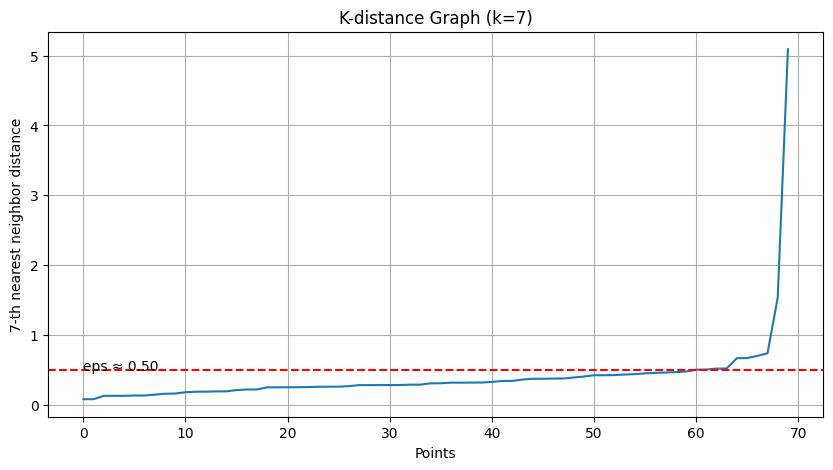

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from scipy.spatial.distance import pdist, squareform

distances = pdist(X_scaled)
dist_matrix = squareform(distances)
k = 4
kth_distances = np.sort(dist_matrix, axis=1)[:, k]
sorted_distances = np.sort(kth_distances)

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(range(len(sorted_distances)), sorted_distances)
plt.xlabel('Points')
plt.ylabel(f'7-th nearest neighbor distance')
plt.title('K-distance Graph (k=7)')
plt.grid(True)

# Add a vertical line at the elbow point (you can adjust this based on visual inspection)
elbow_point = np.where(np.diff(sorted_distances) > np.mean(np.diff(sorted_distances)) + 2*np.std(np.diff(sorted_distances)))[0][0]
plt.axhline(y=0.5, color='r', linestyle='--')
plt.text(0, 0.5, f'eps ≈ {0.5:.2f}')
plt.show()

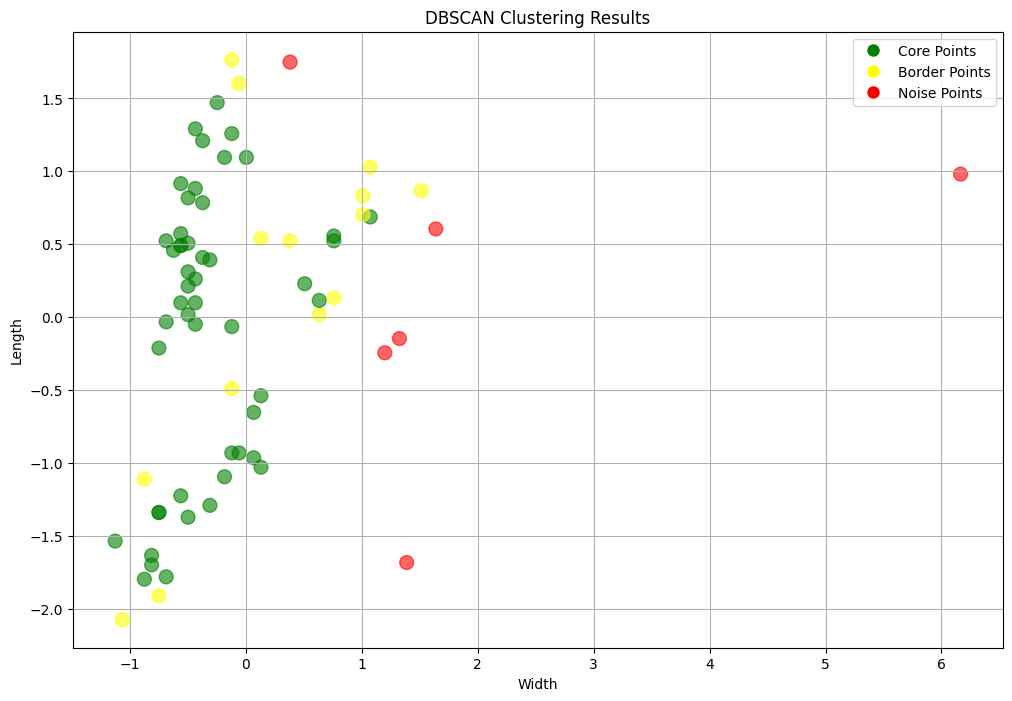


DBSCAN Results Summary:
Number of core points: 50
Number of border points: 14
Number of noise points: 6

Noise Points (Width, Length):
    Width  Length
5     4.5     3.5
22    4.2    12.3
24    4.4    12.9
50    4.9    17.5
59   12.1    19.8
68    2.9    24.5


In [ ]:
# 2. DBSCAN Implementation
dbscan = DBSCAN(eps=0.5, min_samples=7)
clusters = dbscan.fit_predict(X_scaled)

colors = np.where(clusters == -1, 'red', np.where(np.isin(range(len(X_scaled)), dbscan.core_sample_indices_), 'green', 'yellow'))

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors, alpha=0.6, s=100)

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', label='Core Points', markersize=10),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', label='Border Points', markersize=10),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Noise Points', markersize=10)]
plt.legend(handles=legend_elements)

plt.title('DBSCAN Clustering Results')
plt.xlabel('Width')
plt.ylabel('Length')
plt.grid(True)
plt.show()

# Print summary statistics
print("\nDBSCAN Results Summary:")
print(f"Number of core points: {len(dbscan.core_sample_indices_)}")
print(f"Number of border points: {len(np.where(clusters != -1)[0]) - len(dbscan.core_sample_indices_)}")
print(f"Number of noise points: {len(np.where(clusters == -1)[0])}")

# Print the points identified as noise
noise_points = data[clusters == -1]
print("\nNoise Points (Width, Length):")
print(noise_points)

# Question 3

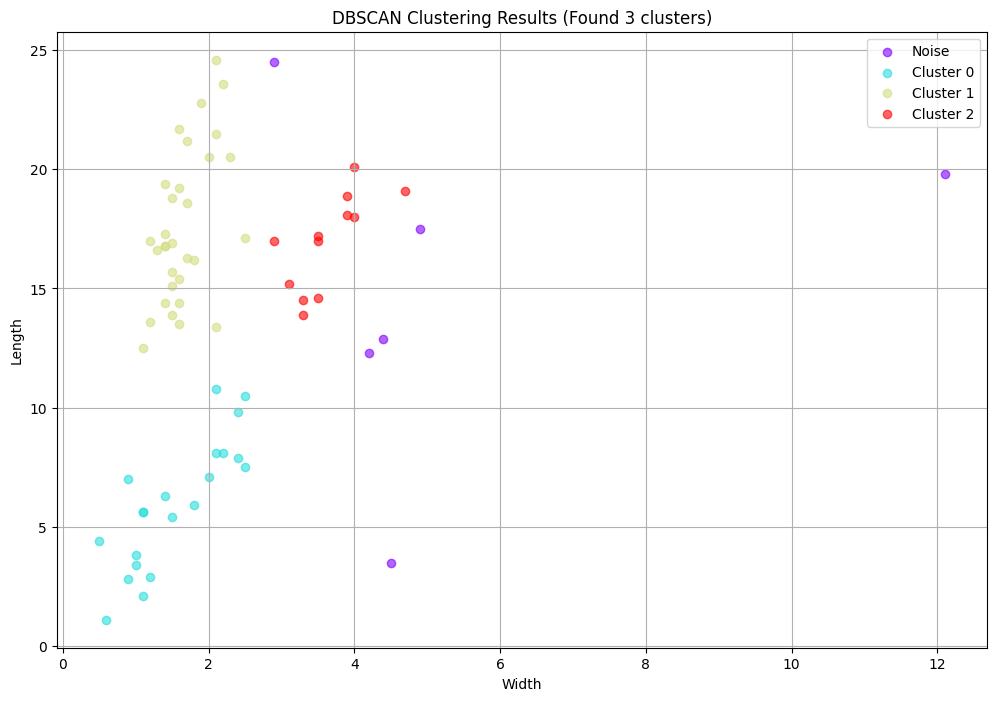


Cluster Statistics:
Number of clusters found: 3

Points per cluster:
Noise points: 6
Cluster 0: 21 points
Cluster 1: 31 points
Cluster 2: 12 points

Silhouette Score: 0.538

Cluster Analysis:

Cluster 0:
Average intra-cluster distance: 0.747
Average distance to Cluster 1: 1.956
Average distance to Cluster 2: 2.238

Cluster 1:
Average intra-cluster distance: 0.689
Average distance to Cluster 0: 1.956
Average distance to Cluster 2: 1.392

Cluster 2:
Average intra-cluster distance: 0.563
Average distance to Cluster 0: 2.238
Average distance to Cluster 1: 1.392


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

plt.figure(figsize=(12, 8))

unique_clusters = np.unique(clusters)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    mask = clusters == cluster
    label = f'Cluster {cluster}' if cluster != -1 else 'Noise'
    plt.scatter(data[mask]['Width'], data[mask]['Length'],
                c=[color], label=label, alpha=0.6)

plt.title(f'DBSCAN Clustering Results (Found {n_clusters} clusters)')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.grid(True)
plt.show()

print("\nCluster Statistics:")
print(f"Number of clusters found: {n_clusters}")
print("\nPoints per cluster:")
for cluster in range(-1, max(clusters) + 1):
    n_points = np.sum(clusters == cluster)
    if cluster == -1:
        print(f"Noise points: {n_points}")
    else:
        print(f"Cluster {cluster}: {n_points} points")


non_noise_mask = clusters != -1
if len(set(clusters[non_noise_mask])) > 1:
    silhouette_avg = silhouette_score(X_scaled[non_noise_mask],
                                    clusters[non_noise_mask])
    print(f"\nSilhouette Score: {silhouette_avg:.3f}")

print("\nCluster Analysis:")
for cluster in range(max(clusters) + 1):
    cluster_points = X_scaled[clusters == cluster]
    if len(cluster_points) > 1:

        intra_distances = np.mean([np.linalg.norm(p1 - p2)
                                 for i, p1 in enumerate(cluster_points)
                                 for p2 in cluster_points[i+1:]])
        print(f"\nCluster {cluster}:")
        print(f"Average intra-cluster distance: {intra_distances:.3f}")


        for other_cluster in range(max(clusters) + 1):
            if other_cluster != cluster:
                other_points = X_scaled[clusters == other_cluster]
                if len(other_points) > 0:
                    inter_distances = np.mean([np.linalg.norm(p1 - p2)
                                            for p1 in cluster_points
                                            for p2 in other_points])
                    print(f"Average distance to Cluster {other_cluster}: {inter_distances:.3f}")

# Question 4

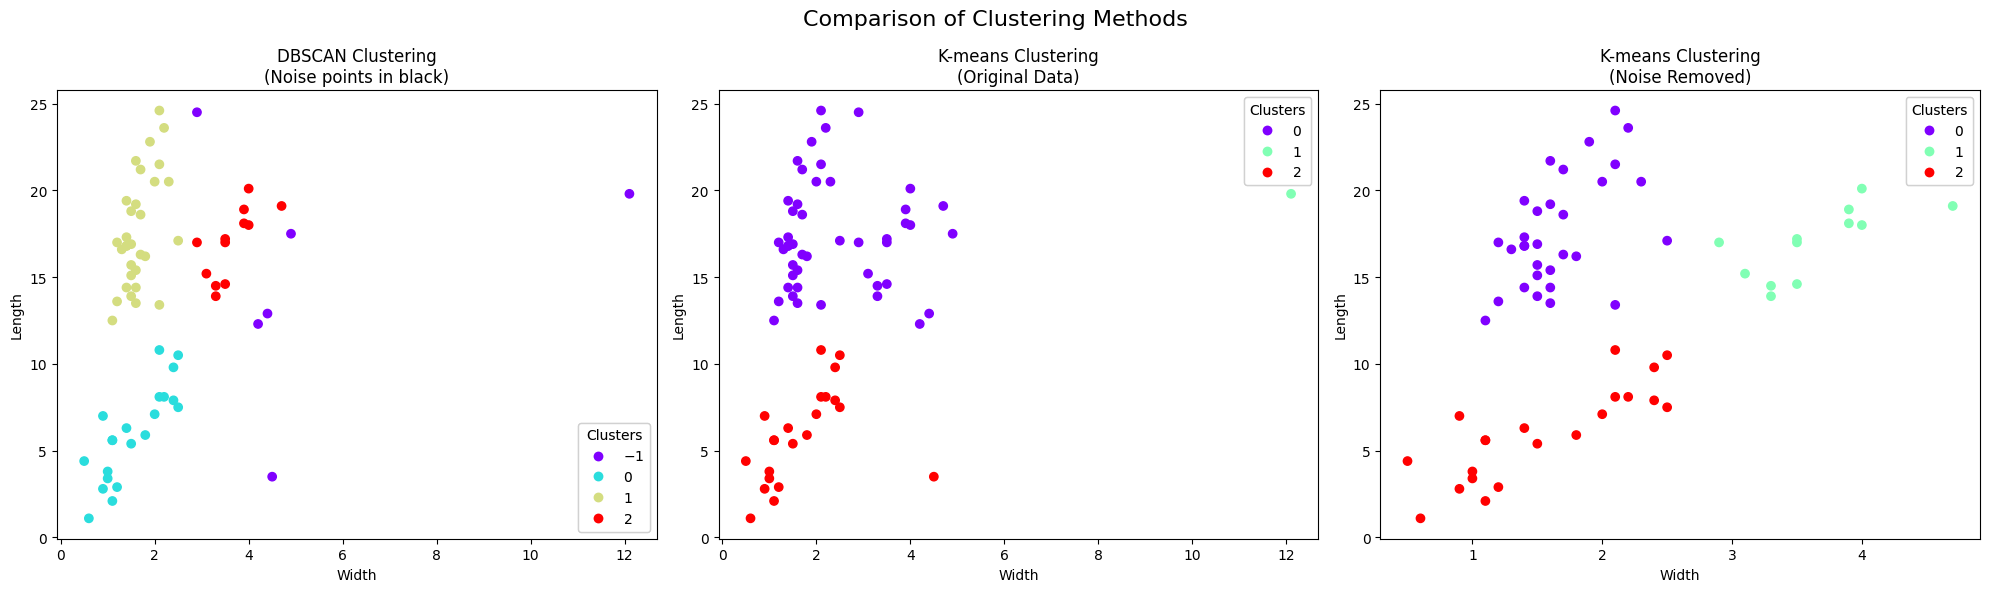


K-means Original Data Statistics:
   Cluster  Size  Center_Width  Center_Length  Spread_Width  Spread_Length
0        0    47      2.370213      17.363830      1.083712       3.125899
1        1     1     12.100000      19.800000      0.000000       0.000000
2        2    22      1.672727       5.890909      0.882240       2.651056

K-means No Noise Statistics:
   Cluster  Size  Center_Width  Center_Length  Spread_Width  Spread_Length
0        0    31      1.658065      17.590323      0.337710       3.185284
1        1    12      3.633333      16.966667      0.469633       1.930602
2        2    21      1.538095       6.004762      0.645480       2.660375


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Read data
data = pd.read_csv("https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/HomeWork3/leaves_data_homework3.csv")
X = data[['Width', 'Length']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. DBSCAN clustering (from previous analysis)
dbscan = DBSCAN(eps=0.5, min_samples=7)
dbscan_labels = dbscan.fit_predict(X_scaled)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Get non-noise points for second K-means
non_noise_mask = dbscan_labels != -1
X_no_noise = X[non_noise_mask]
X_scaled_no_noise = X_scaled[non_noise_mask]

# 2. K-means on original data
kmeans_original = KMeans(n_clusters=n_clusters_dbscan, random_state=42)
kmeans_labels_original = kmeans_original.fit_predict(X_scaled)

# 3. K-means on data without noise
kmeans_no_noise = KMeans(n_clusters=n_clusters_dbscan, random_state=42)
kmeans_labels_no_noise = kmeans_no_noise.fit_predict(X_scaled_no_noise)

# Create visualization
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Comparison of Clustering Methods', fontsize=16)

# Plot 1: DBSCAN results
scatter1 = axs[0].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow')
axs[0].set_title('DBSCAN Clustering\n(Noise points in black)')
axs[0].set_xlabel('Width')
axs[0].set_ylabel('Length')
legend1 = axs[0].legend(*scatter1.legend_elements(), title="Clusters")
axs[0].add_artist(legend1)

# Plot 2: K-means on original data
scatter2 = axs[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels_original, cmap='rainbow')
axs[1].set_title('K-means Clustering\n(Original Data)')
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Length')
legend2 = axs[1].legend(*scatter2.legend_elements(), title="Clusters")
axs[1].add_artist(legend2)

# Plot 3: K-means on data without noise
scatter3 = axs[2].scatter(X_no_noise[:, 0], X_no_noise[:, 1], c=kmeans_labels_no_noise, cmap='rainbow')
axs[2].set_title('K-means Clustering\n(Noise Removed)')
axs[2].set_xlabel('Width')
axs[2].set_ylabel('Length')
legend3 = axs[2].legend(*scatter3.legend_elements(), title="Clusters")
axs[2].add_artist(legend3)

plt.tight_layout()
plt.show()

# Calculate cluster statistics for comparison
def get_cluster_stats(data, labels):
    stats = []
    for i in range(max(labels) + 1):
        mask = labels == i
        cluster_points = data[mask]
        if len(cluster_points) > 0:
            stats.append({
                'Cluster': i,
                'Size': len(cluster_points),
                'Center_Width': np.mean(cluster_points[:, 0]),
                'Center_Length': np.mean(cluster_points[:, 1]),
                'Spread_Width': np.std(cluster_points[:, 0]),
                'Spread_Length': np.std(cluster_points[:, 1])
            })
    return pd.DataFrame(stats)

print("\nK-means Original Data Statistics:")
print(get_cluster_stats(X, kmeans_labels_original))
print("\nK-means No Noise Statistics:")
print(get_cluster_stats(X_no_noise, kmeans_labels_no_noise))

# Question 5

<ipython-input-7-f797c7b14ef5>:32: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=cluster_df, x='Width', y='Length',


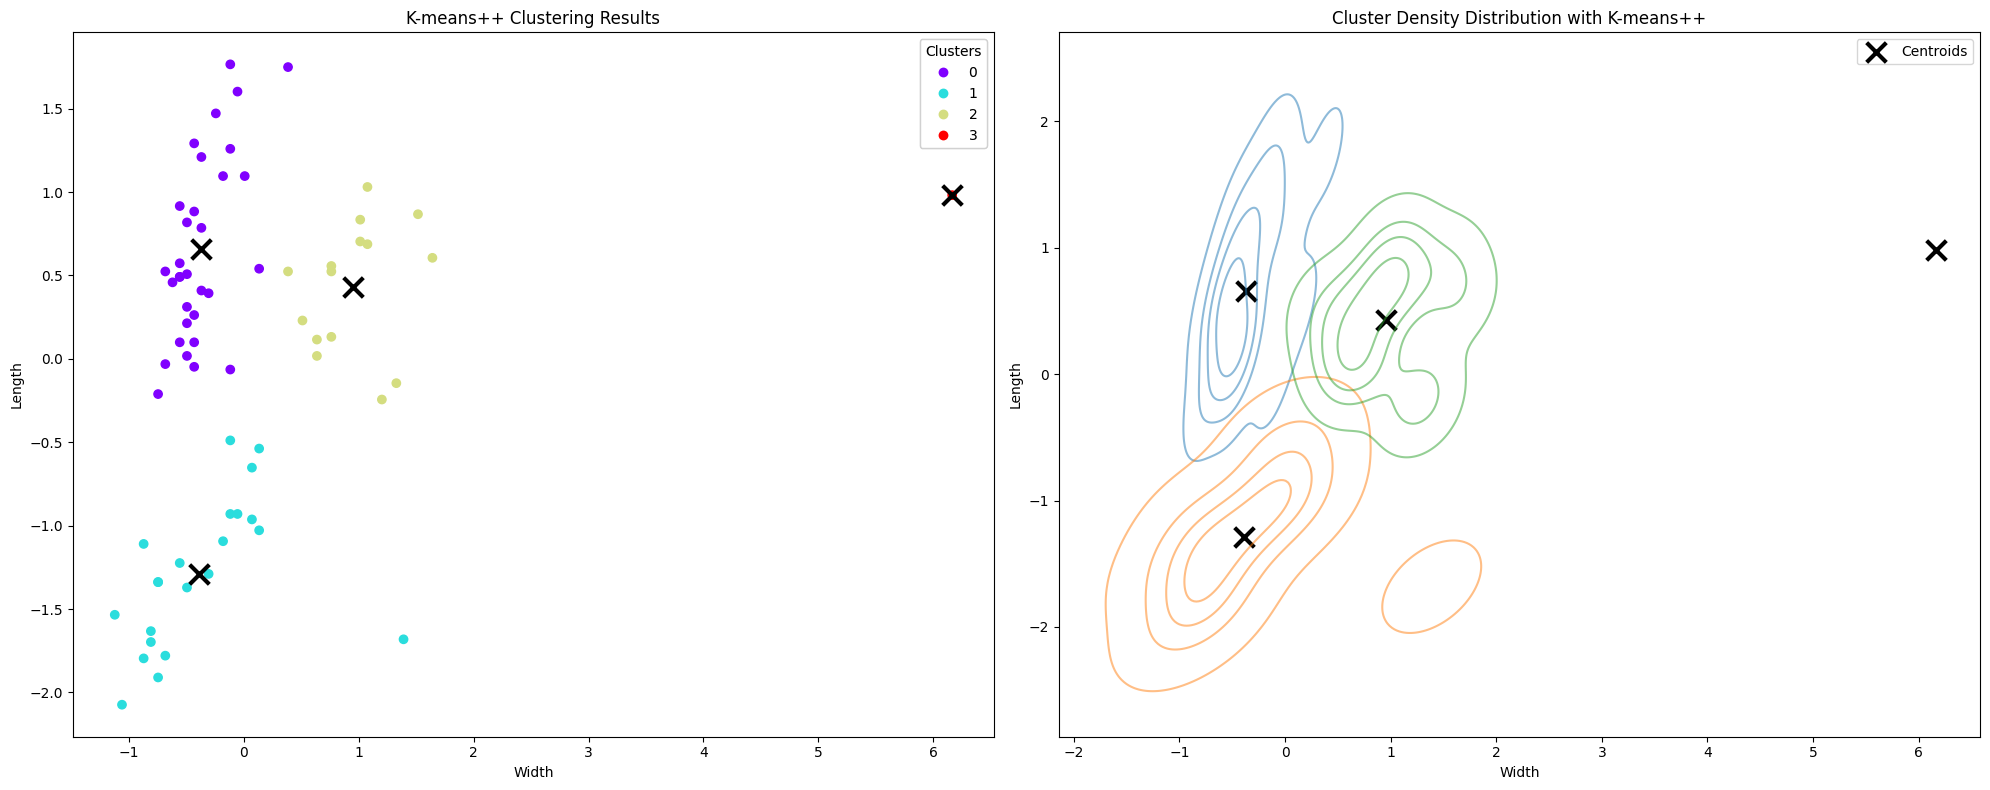


K-means++ Cluster Statistics:
   Cluster  Size  Center_Width  Center_Length  Spread_Width  Spread_Length  \
0        0    32     -0.372744       0.655636      0.249149       0.548525   
1        1    22     -0.387919      -1.290878      0.554436       0.433082   
2        2    15      0.953135       0.429175      0.352126       0.374533   
3        3     1      6.165006       0.981339      0.000000       0.000000   

     Inertia  
0  11.614567  
1  10.889092  
2   3.964015  
3   0.000000  

Overall Clustering Metrics:
Total Inertia: 26.47
Number of Iterations to Converge: 3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

n_clusters = 4  # Using same number of clusters as before
kmeans_pp = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
kmeans_pp_labels = kmeans_pp.fit_predict(X_scaled)

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Scatter plot of clusters
scatter = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_pp_labels, cmap='rainbow')
ax1.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1],
            color='black', marker='x', s=200, linewidth=3, label='Centroids')
ax1.set_title('K-means++ Clustering Results')
ax1.set_xlabel('Width')
ax1.set_ylabel('Length')
ax1.legend()
legend1 = ax1.legend(*scatter.legend_elements(), title="Clusters")
ax1.add_artist(legend1)

# Plot 2: Density plot with cluster centers
for i in range(n_clusters):
    mask = kmeans_pp_labels == i
    cluster_points = X_scaled[mask]
    if len(cluster_points) > 0:
        cluster_df = pd.DataFrame(cluster_points, columns=['Width', 'Length'])
        sns.kdeplot(data=cluster_df, x='Width', y='Length',
                   ax=ax2, alpha=0.5, levels=5, label=f'Cluster {i}')

ax2.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1],
            color='black', marker='x', s=200, linewidth=3, label='Centroids')
ax2.set_title('Cluster Density Distribution with K-means++')
ax2.set_xlabel('Width')
ax2.set_ylabel('Length')
ax2.legend()

plt.tight_layout()
plt.show()

# Calculate and display cluster statistics
cluster_stats = []
for i in range(n_clusters):
    mask = kmeans_pp_labels == i
    cluster_points = X_scaled[mask]

    stats = {
        'Cluster': i,
        'Size': len(cluster_points),
        'Center_Width': np.mean(cluster_points[:, 0]),
        'Center_Length': np.mean(cluster_points[:, 1]),
        'Spread_Width': np.std(cluster_points[:, 0]),
        'Spread_Length': np.std(cluster_points[:, 1]),
        'Inertia': np.sum((cluster_points - kmeans_pp.cluster_centers_[i])**2)
    }
    cluster_stats.append(stats)

stats_df = pd.DataFrame(cluster_stats)
print("\nK-means++ Cluster Statistics:")
print(stats_df)

# Calculate overall clustering quality metrics
print("\nOverall Clustering Metrics:")
print(f"Total Inertia: {kmeans_pp.inertia_:.2f}")
print(f"Number of Iterations to Converge: {kmeans_pp.n_iter_}")

# Question 6

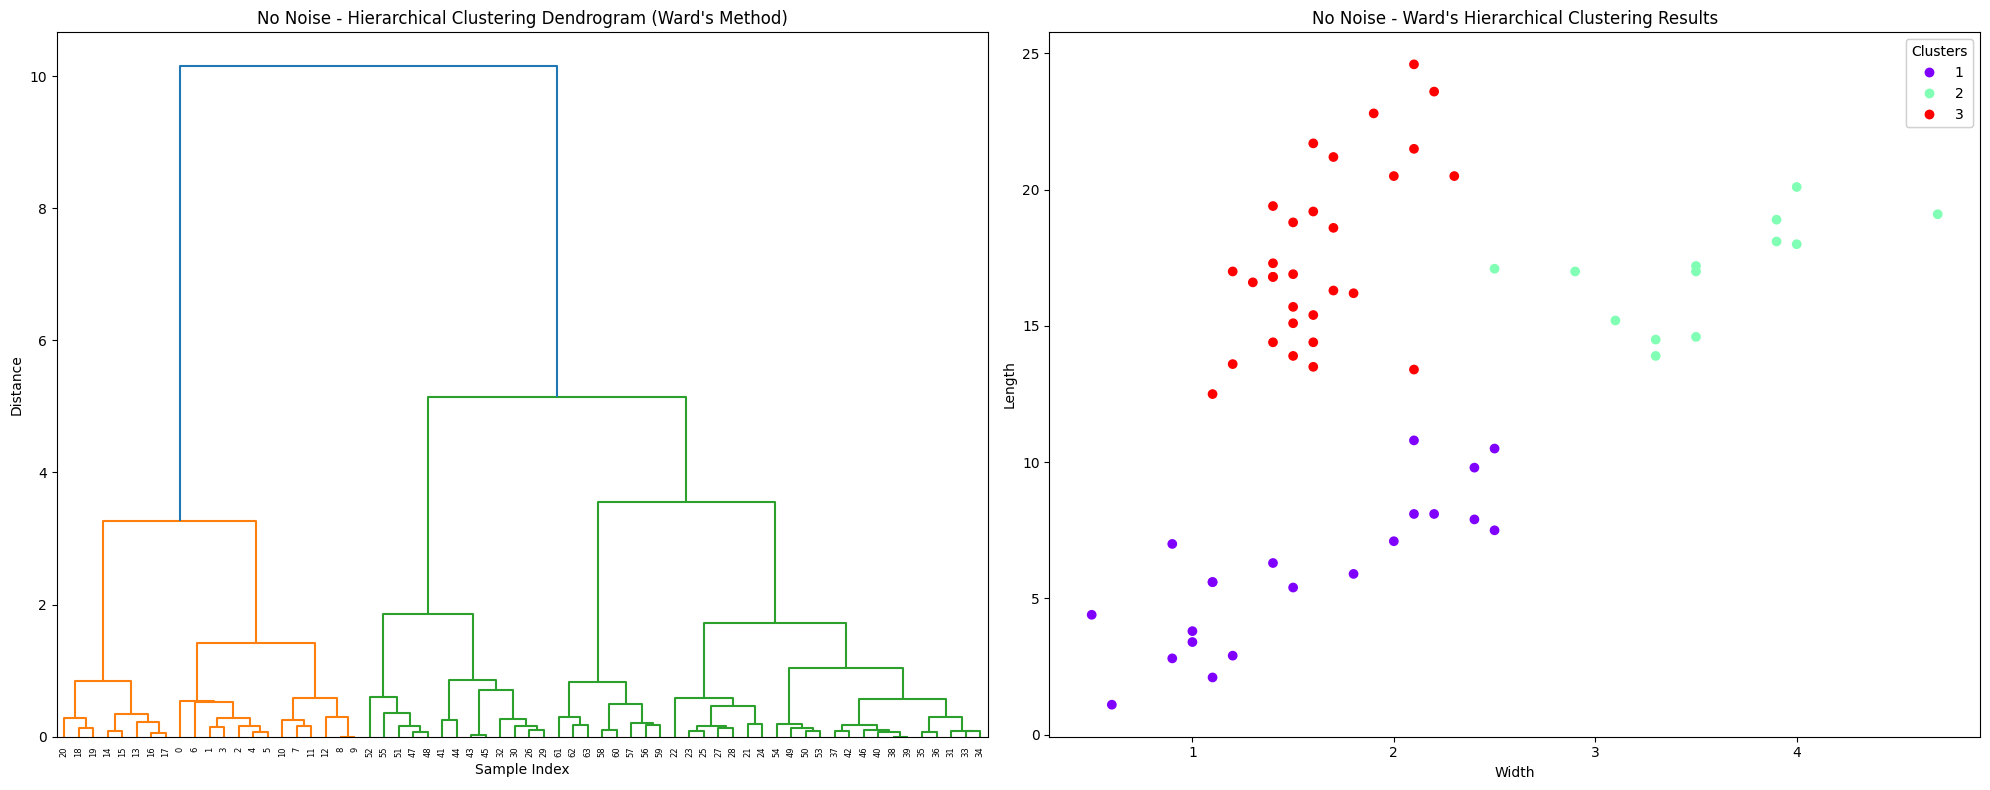


No Noise - Ward's Hierarchical Clustering Statistics:
   Cluster  Size  Center_Width  Center_Length  Spread_Width  Spread_Length
0        1    21      1.538095       6.004762      0.645480       2.660375
1        2    13      3.546154      16.976923      0.542948       1.855202
2        3    30      1.630000      17.606667      0.305669       3.236658


<ipython-input-13-35792115e551>:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


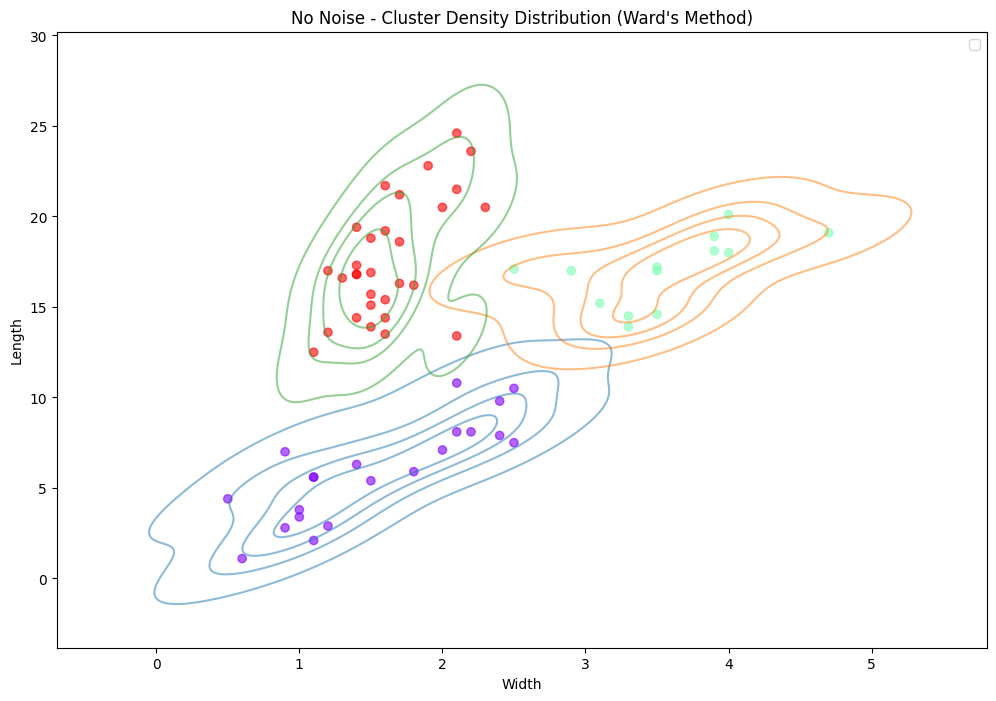

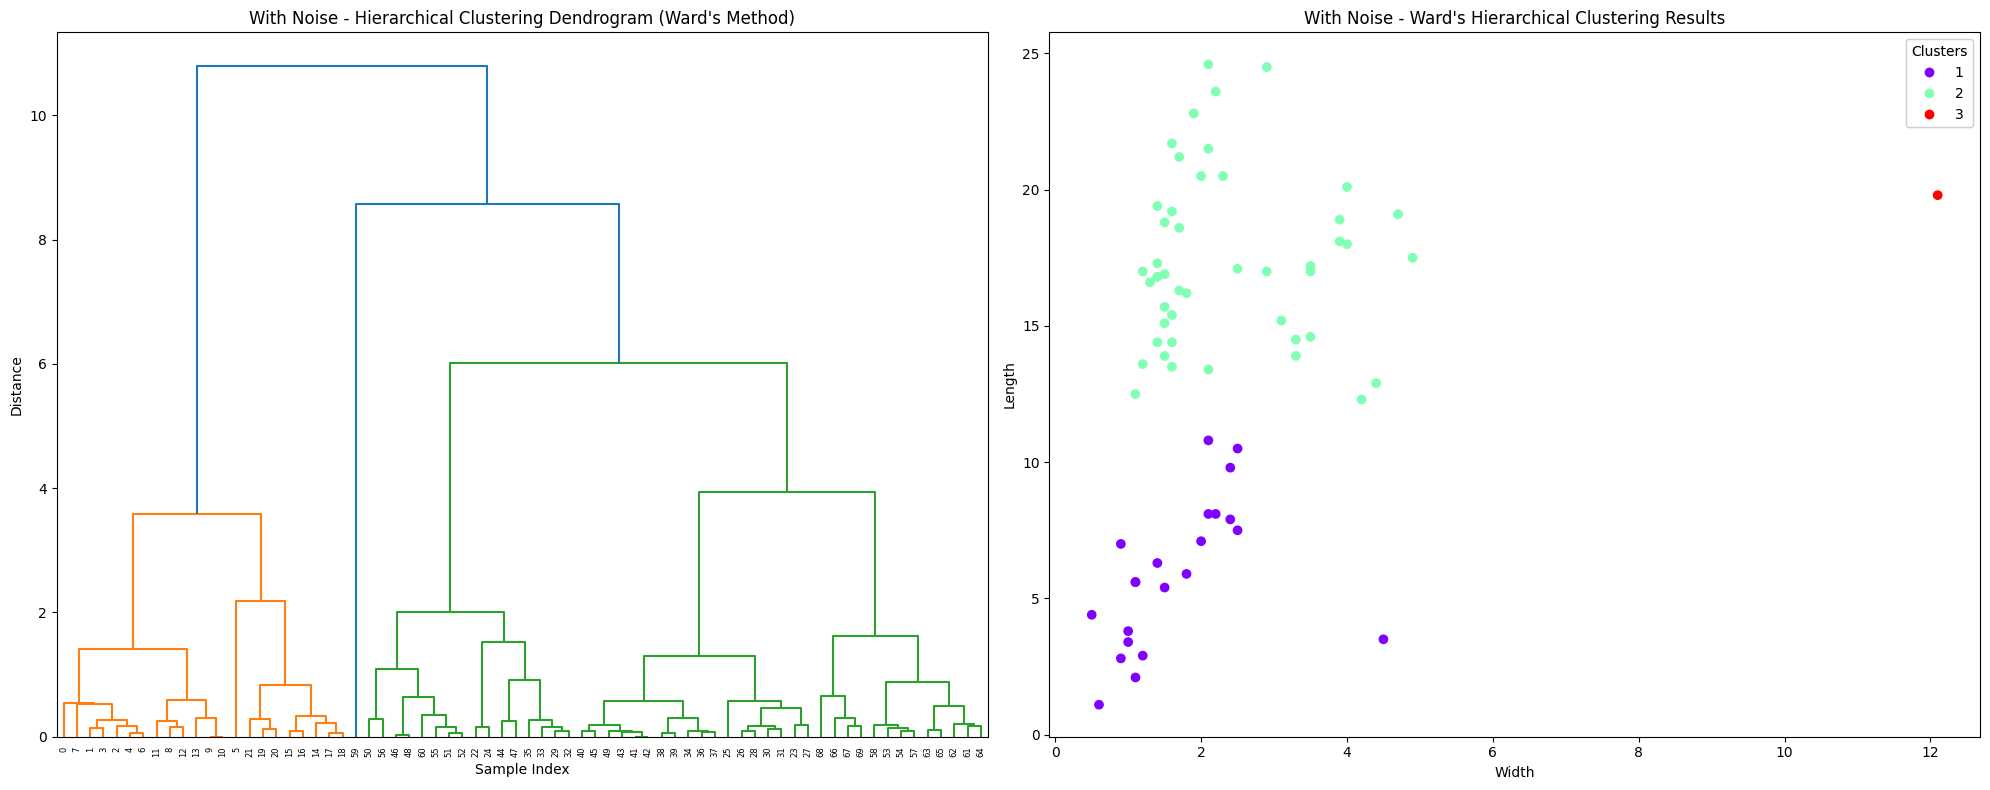


With Noise - Ward's Hierarchical Clustering Statistics:
   Cluster  Size  Center_Width  Center_Length  Spread_Width  Spread_Length
0        1    22      1.672727       5.890909      0.882240       2.651056
1        2    47      2.370213      17.363830      1.083712       3.125899
2        3     1     12.100000      19.800000      0.000000       0.000000


<ipython-input-13-35792115e551>:62: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=cluster_df, x='Width', y='Length',
<ipython-input-13-35792115e551>:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


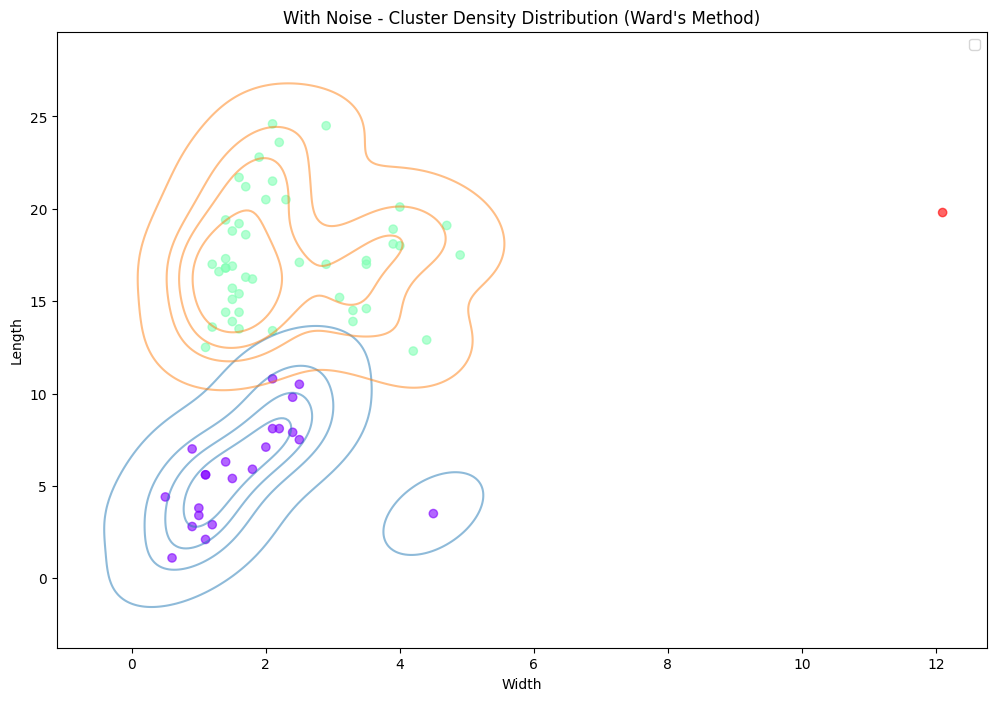

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

def perform_hierarchical_clustering(X_scaled, X_raw, n_clusters=3, title_prefix=""):
    # Perform hierarchical clustering with Ward's method
    linkage_matrix = linkage(X_scaled, method='ward')

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plot 1: Dendrogram
    dendrogram(linkage_matrix, ax=ax1)
    ax1.set_title(f"{title_prefix} Hierarchical Clustering Dendrogram (Ward's Method)")
    ax1.set_xlabel('Sample Index')
    ax1.set_ylabel('Distance')

    # Cut the dendrogram to get clusters
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    # Plot 2: Scatter plot with hierarchical clustering results
    scatter = ax2.scatter(X_raw[:, 0], X_raw[:, 1], c=clusters, cmap='rainbow')
    ax2.set_title(f"{title_prefix} Ward's Hierarchical Clustering Results")
    ax2.set_xlabel('Width')
    ax2.set_ylabel('Length')
    legend = ax2.legend(*scatter.legend_elements(), title="Clusters")
    ax2.add_artist(legend)

    plt.tight_layout()
    plt.show()

    # Calculate cluster statistics
    cluster_stats = []
    for i in range(1, n_clusters + 1):  # clusters are 1-indexed
        mask = clusters == i
        cluster_points = X_raw[mask]
        stats = {
            'Cluster': i,
            'Size': len(cluster_points),
            'Center_Width': np.mean(cluster_points[:, 0]),
            'Center_Length': np.mean(cluster_points[:, 1]),
            'Spread_Width': np.std(cluster_points[:, 0]),
            'Spread_Length': np.std(cluster_points[:, 1])
        }
        cluster_stats.append(stats)

    stats_df = pd.DataFrame(cluster_stats)
    print(f"\n{title_prefix} Ward's Hierarchical Clustering Statistics:")
    print(stats_df)

    # Additional visualization: Cluster density distribution
    plt.figure(figsize=(12, 8))
    cluster_df = pd.DataFrame(X_raw, columns=['Width', 'Length'])

    for i in range(1, n_clusters + 1):
        mask = clusters == i
        cluster_points = X_raw[mask]
        cluster_df = pd.DataFrame(cluster_points, columns=['Width', 'Length'])
        sns.kdeplot(data=cluster_df, x='Width', y='Length',
                   alpha=0.5, levels=5, label=f'Cluster {i}')

    plt.scatter(X_raw[:, 0], X_raw[:, 1], c=clusters, cmap='rainbow', alpha=0.6)
    plt.title(f"{title_prefix} Cluster Density Distribution (Ward's Method)")
    plt.xlabel('Width')
    plt.ylabel('Length')
    plt.legend()
    plt.show()

    return clusters, stats_df

# Perform analysis for data without noise
clusters_no_noise, stats_no_noise = perform_hierarchical_clustering(
    X_scaled_no_noise,
    X_no_noise,
    n_clusters=3,
    title_prefix="No Noise -"
)

# Perform analysis for data with noise
clusters_noise, stats_noise = perform_hierarchical_clustering(
    X_scaled,
    X,
    n_clusters=3,
    title_prefix="With Noise -"
)

# Question 7

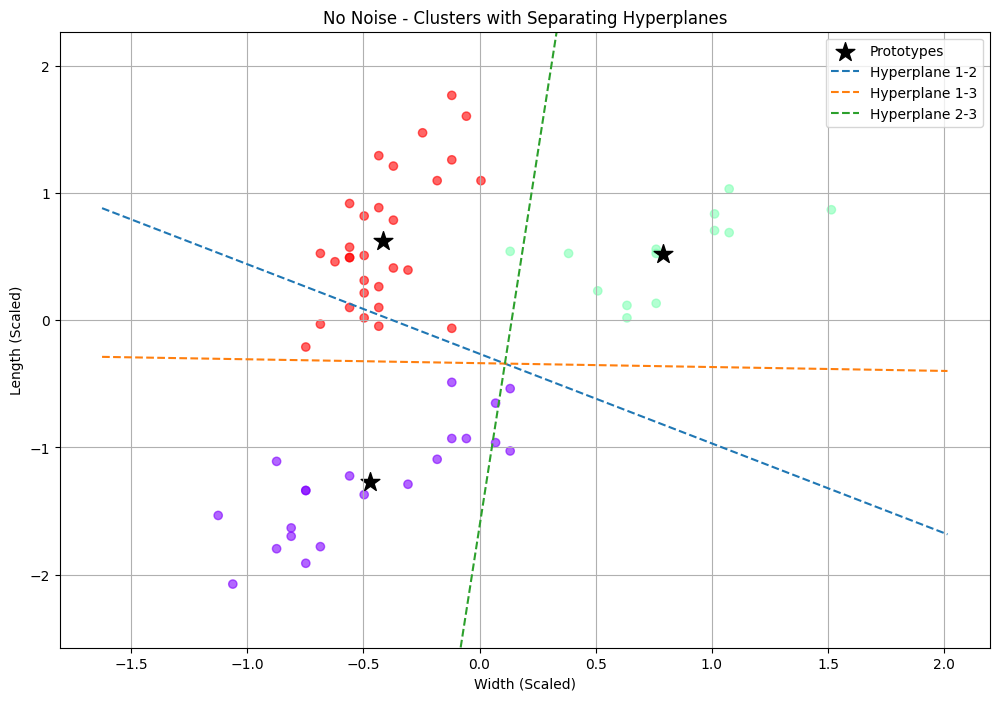


No Noise - Separating Hyperplane Equations:
Hyperplane 1: 0.576x + 0.818y + 0.216 = 0
Hyperplane 2: 0.030x + 1.000y + 0.338 = 0
Hyperplane 3: -0.996x + 0.085y + 0.138 = 0

No Noise - Example classification:
Point [-1.0620652  -2.07353032] belongs to Cluster 1


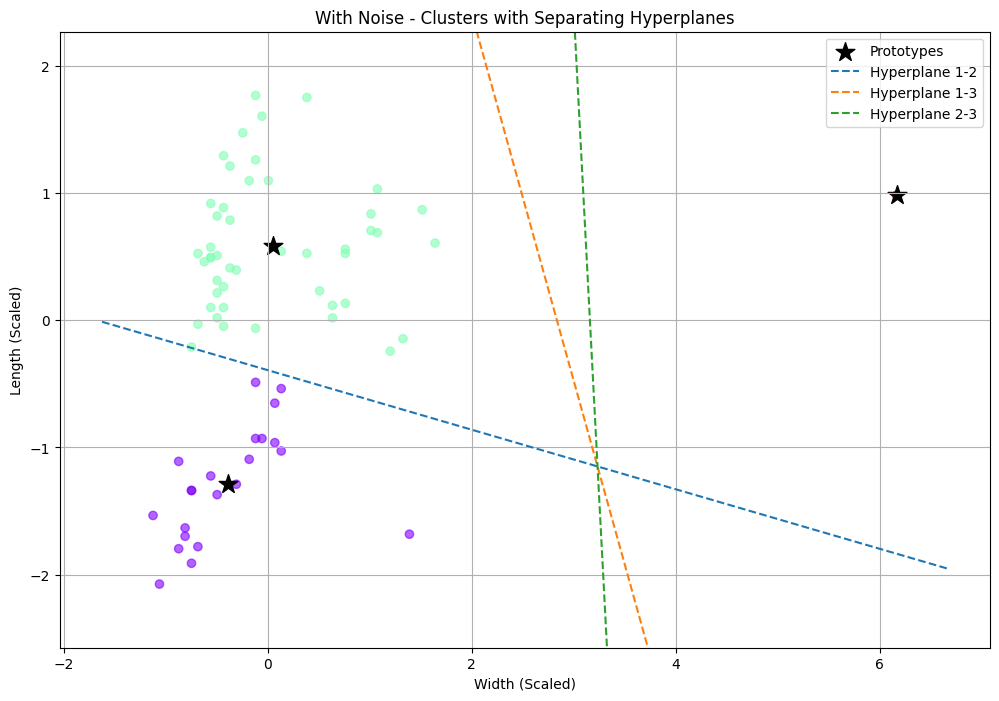


With Noise - Separating Hyperplane Equations:
Hyperplane 1: 0.228x + 0.974y + 0.383 = 0
Hyperplane 2: 0.945x + 0.328y + -2.678 = 0
Hyperplane 3: 0.998x + 0.065y + -3.152 = 0

With Noise - Example classification:
Point [-1.0620652  -2.07353032] belongs to Cluster 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

def perform_prototype_analysis(X_scaled, title_prefix="", n_clusters=3):
    # Perform hierarchical clustering with Ward's method
    linkage_matrix = linkage(X_scaled, method='ward')
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    def calculate_prototypes(X, clusters):
        prototypes = []
        for i in range(1, max(clusters) + 1):
            mask = clusters == i
            prototype = np.mean(X[mask], axis=0)
            prototypes.append(prototype)
        return np.array(prototypes)

    def get_hyperplane_eq(p1, p2):
        # Midpoint of the line connecting the prototypes
        midpoint = (p1 + p2) / 2
        # Direction vector of the line connecting the prototypes
        direction = p2 - p1
        # Normal vector to the separating hyperplane
        normal = direction / np.linalg.norm(direction)
        # Calculate the equation coefficients (ax + by + c = 0)
        a = normal[0]
        b = normal[1]
        c = -(a * midpoint[0] + b * midpoint[1])
        return a, b, c

    def plot_clusters_and_hyperplanes(X, clusters, prototypes):
        plt.figure(figsize=(12, 8))
        # Plot data points colored by cluster
        scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', alpha=0.6)
        # Plot prototypes
        plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='*',
                   s=200, label='Prototypes')

        # Calculate and plot hyperplanes
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx = np.linspace(x_min, x_max, 100)

        # Get hyperplane equations between each pair of prototypes
        hyperplanes = []
        for i in range(len(prototypes)):
            for j in range(i + 1, len(prototypes)):
                a, b, c = get_hyperplane_eq(prototypes[i], prototypes[j])
                hyperplanes.append((a, b, c))
                # Plot hyperplane
                if abs(b) > 1e-10:  # Avoid division by zero
                    yy = (-a * xx - c) / b
                    plt.plot(xx, yy, '--', label=f'Hyperplane {i+1}-{j+1}')

        plt.ylim(y_min, y_max)
        plt.xlabel('Width (Scaled)')
        plt.ylabel('Length (Scaled)')
        plt.title(f'{title_prefix} Clusters with Separating Hyperplanes')
        plt.legend()
        plt.grid(True)
        plt.show()
        return hyperplanes

    def classify_point(point, prototypes):
        distances = np.linalg.norm(prototypes - point, axis=1)
        return np.argmin(distances) + 1  # Add 1 because clusters are 1-indexed

    # Calculate prototypes
    prototypes = calculate_prototypes(X_scaled, clusters)

    # Plot clusters and get hyperplanes
    hyperplanes = plot_clusters_and_hyperplanes(X_scaled, clusters, prototypes)

    # Print the equations of the hyperplanes
    print(f"\n{title_prefix} Separating Hyperplane Equations:")
    for i, (a, b, c) in enumerate(hyperplanes):
        print(f"Hyperplane {i+1}: {a:.3f}x + {b:.3f}y + {c:.3f} = 0")

    # Example classification of a new point
    test_point = X_scaled[0]  # Using first point as example
    cluster = classify_point(test_point, prototypes)
    print(f"\n{title_prefix} Example classification:")
    print(f"Point {test_point} belongs to Cluster {cluster}")

    return clusters, prototypes, hyperplanes

# Perform analysis for data without noise
clusters_no_noise, prototypes_no_noise, hyperplanes_no_noise = perform_prototype_analysis(
    X_scaled_no_noise,
    title_prefix="No Noise -"
)

# Perform analysis for data with noise
clusters_noise, prototypes_noise, hyperplanes_noise = perform_prototype_analysis(
    X_scaled,
    title_prefix="With Noise -"
)

# Question 8


No Noise - Multivariate Gaussian Parameters for Each Cluster:

Cluster 1 (n=21):
Mean vector (µ):
Width: -0.4725
Length: -1.2723

Covariance matrix (Σ):
[0.1728 0.1528]
[0.1528 0.1983]

Cluster 2 (n=13):
Mean vector (µ):
Width: 0.7894
Length: 0.5202

Covariance matrix (Σ):
[0.1261 0.0644]
[0.0644 0.0995]

Cluster 3 (n=30):
Mean vector (µ):
Width: -0.4148
Length: 0.6230

Covariance matrix (Σ):
[0.0382 0.0632]
[0.0632 0.2892]



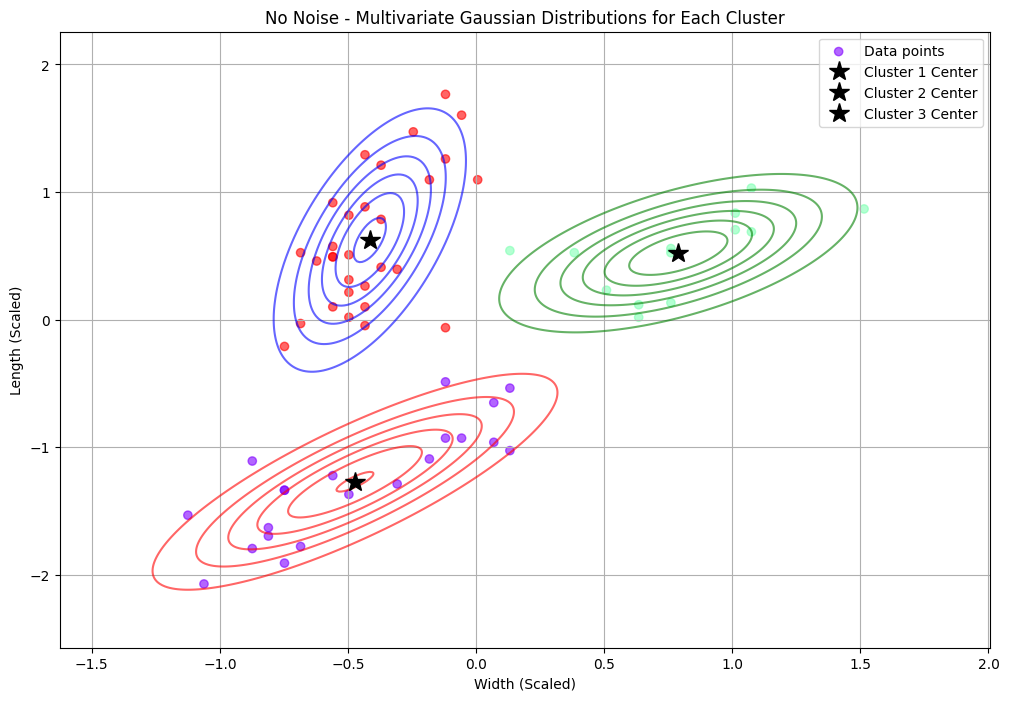


No Noise - Probability Density Values for Sample Point:
Cluster 1: 0.299739
Cluster 2: 0.000000
Cluster 3: 0.000006

With Noise - Multivariate Gaussian Parameters for Each Cluster:

Cluster 1 (n=22):
Mean vector (µ):
Width: -0.3879
Length: -1.2909

Covariance matrix (Σ):
[0.3220 0.1109]
[0.1109 0.1965]

Cluster 2 (n=47):
Mean vector (µ):
Width: 0.0504
Length: 0.5834

Covariance matrix (Σ):
[0.4739 -0.0003]
[-0.0003 0.2664]

Cluster 3 (n=1):
Mean vector (µ):
Width: 6.1650
Length: 0.9813

Covariance matrix (Σ):
Single point cluster - using minimal covariance matrix:
[0.0100 0.0000]
[0.0000 0.0100]



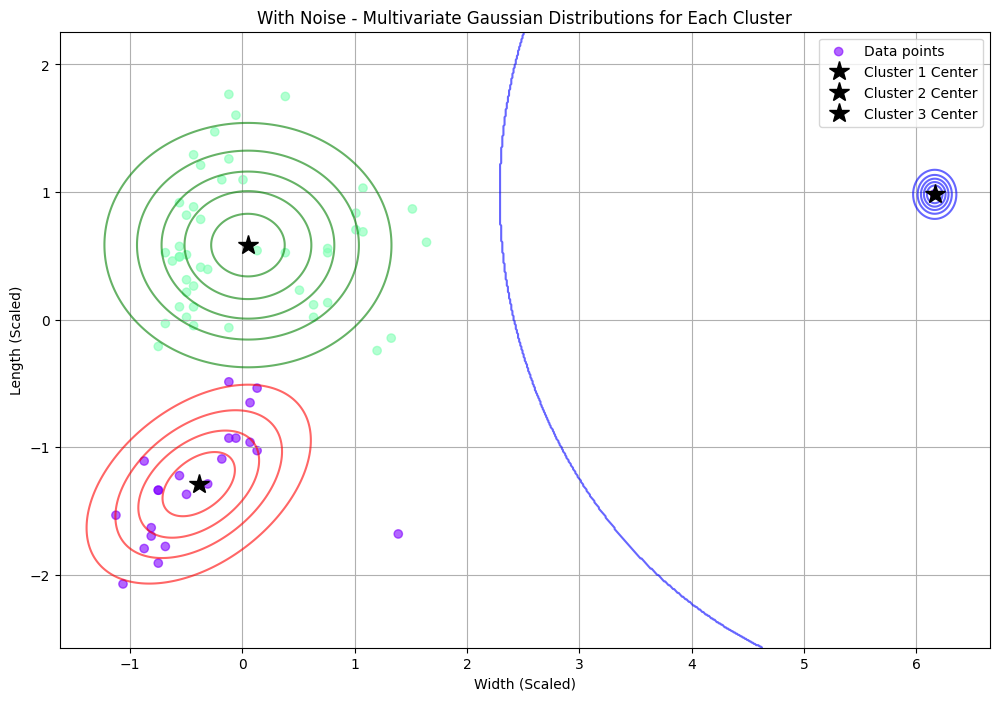


With Noise - Probability Density Values for Sample Point:
Cluster 1: 0.133652
Cluster 2: 0.000000
Cluster 3: 0.000000


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.cluster.hierarchy import linkage, fcluster

def perform_gaussian_mixture_analysis(X_scaled, title_prefix="", n_clusters=3):
    # Perform hierarchical clustering
    linkage_matrix = linkage(X_scaled, method='ward')
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    def calculate_gaussian_params(X, cluster_labels):
        gaussian_params = []
        for i in range(1, n_clusters + 1):
            # Get points belonging to current cluster
            cluster_points = X[cluster_labels == i]
            # Calculate mean vector
            mean = np.mean(cluster_points, axis=0)
            # Calculate covariance matrix with handling for single-point clusters
            if len(cluster_points) > 1:
                cov = np.cov(cluster_points.T)
            else:
                # For single-point clusters, use a small diagonal covariance matrix
                cov = np.eye(2) * 0.01
            # Store parameters
            gaussian_params.append({
                'cluster': i,
                'mean': mean,
                'cov': cov,
                'size': len(cluster_points)
            })
        return gaussian_params

    def print_gaussian_params(gaussian_params):
        print(f"\n{title_prefix} Multivariate Gaussian Parameters for Each Cluster:\n")
        for params in gaussian_params:
            print(f"Cluster {params['cluster']} (n={params['size']}):")
            print(f"Mean vector (µ):")
            print(f"Width: {params['mean'][0]:.4f}")
            print(f"Length: {params['mean'][1]:.4f}\n")
            print("Covariance matrix (Σ):")
            if params['size'] > 1:
                print(f"[{params['cov'][0,0]:.4f} {params['cov'][0,1]:.4f}]")
                print(f"[{params['cov'][1,0]:.4f} {params['cov'][1,1]:.4f}]\n")
            else:
                print("Single point cluster - using minimal covariance matrix:")
                print(f"[{params['cov'][0,0]:.4f} {params['cov'][0,1]:.4f}]")
                print(f"[{params['cov'][1,0]:.4f} {params['cov'][1,1]:.4f}]\n")

    def plot_gaussian_distributions(X, clusters, gaussian_params):
        plt.figure(figsize=(12, 8))
        # Create grid of points
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
        pos = np.dstack((x, y))

        # Plot original data points
        scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow',
                            alpha=0.6, label='Data points')

        # Plot contours for each Gaussian distribution
        colors = ['red', 'green', 'blue']
        for i, params in enumerate(gaussian_params):
            rv = multivariate_normal(params['mean'], params['cov'])
            plt.contour(x, y, rv.pdf(pos), levels=6, colors=colors[i],
                       alpha=0.6)
            # Add cluster centers
            plt.plot(params['mean'][0], params['mean'][1], 'k*', markersize=15,
                    label=f'Cluster {i+1} Center')

        plt.xlabel('Width (Scaled)')
        plt.ylabel('Length (Scaled)')
        plt.title(f'{title_prefix} Multivariate Gaussian Distributions for Each Cluster')
        plt.legend()
        plt.grid(True)
        plt.show()

    def calculate_pdf(point, gaussian_params):
        pdfs = []
        for params in gaussian_params:
            rv = multivariate_normal(params['mean'], params['cov'])
            pdf = rv.pdf(point)
            pdfs.append(pdf)
        return pdfs

    # Calculate Gaussian parameters for each cluster
    gaussian_params = calculate_gaussian_params(X_scaled, clusters)

    # Print parameters
    print_gaussian_params(gaussian_params)

    # Plot the distributions
    plot_gaussian_distributions(X_scaled, clusters, gaussian_params)

    # Example: Calculate PDFs for a sample point
    sample_point = X_scaled[0]
    pdfs = calculate_pdf(sample_point, gaussian_params)
    print(f"\n{title_prefix} Probability Density Values for Sample Point:")
    for i, pdf in enumerate(pdfs):
        print(f"Cluster {i+1}: {pdf:.6f}")

    return clusters, gaussian_params

# Perform analysis for data without noise
clusters_no_noise, gaussian_params_no_noise = perform_gaussian_mixture_analysis(
    X_scaled_no_noise,
    title_prefix="No Noise -"
)

# Perform analysis for data with noise
clusters_noise, gaussian_params_noise = perform_gaussian_mixture_analysis(
    X_scaled,
    title_prefix="With Noise -"
)

# Question 9


No Noise - Classification of point [1.9 6. ]:

1. Maximum Likelihood Estimation (MLE) Method:
Classification: Cluster 1
Likelihoods for each cluster:
Cluster 1: 3.116544e-01
Cluster 2: 3.086543e-08
Cluster 3: 1.617068e-06

2. Hyperplane Method:
Classification: Cluster 1
Distances to prototypes:
Distance to Cluster 1 prototype: 0.2274
Distance to Cluster 2 prototype: 2.0702
Distance to Cluster 3 prototype: 1.9037

3. K-Nearest Neighbors Method (k=5):
Classification: Cluster 1
Classes of 5 nearest neighbors: [1 1 1 1 1]
Distances to 5 nearest neighbors: [0.06493267 0.19037021 0.26981003 0.31801941 0.36535982]


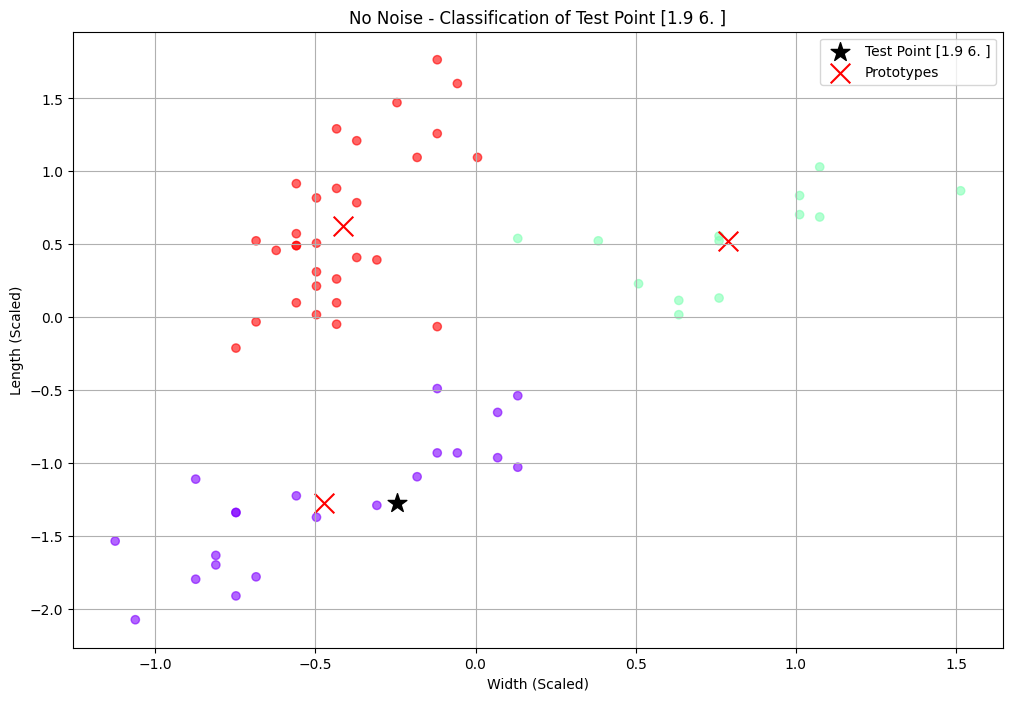


With Noise - Classification of point [1.9 6. ]:

1. Maximum Likelihood Estimation (MLE) Method:
Classification: Cluster 1
Likelihoods for each cluster:
Cluster 1: 2.139660e-01
Cluster 2: 4.254595e-04
Cluster 3: 0.000000e+00

2. Hyperplane Method:
Classification: Cluster 1
Distances to prototypes:
Distance to Cluster 1 prototype: 0.1439
Distance to Cluster 2 prototype: 1.8798
Distance to Cluster 3 prototype: 6.7950

3. K-Nearest Neighbors Method (k=5):
Classification: Cluster 1
Classes of 5 nearest neighbors: [1 1 1 1 1]
Distances to 5 nearest neighbors: [0.06493267 0.19037021 0.26981003 0.31801941 0.36535982]


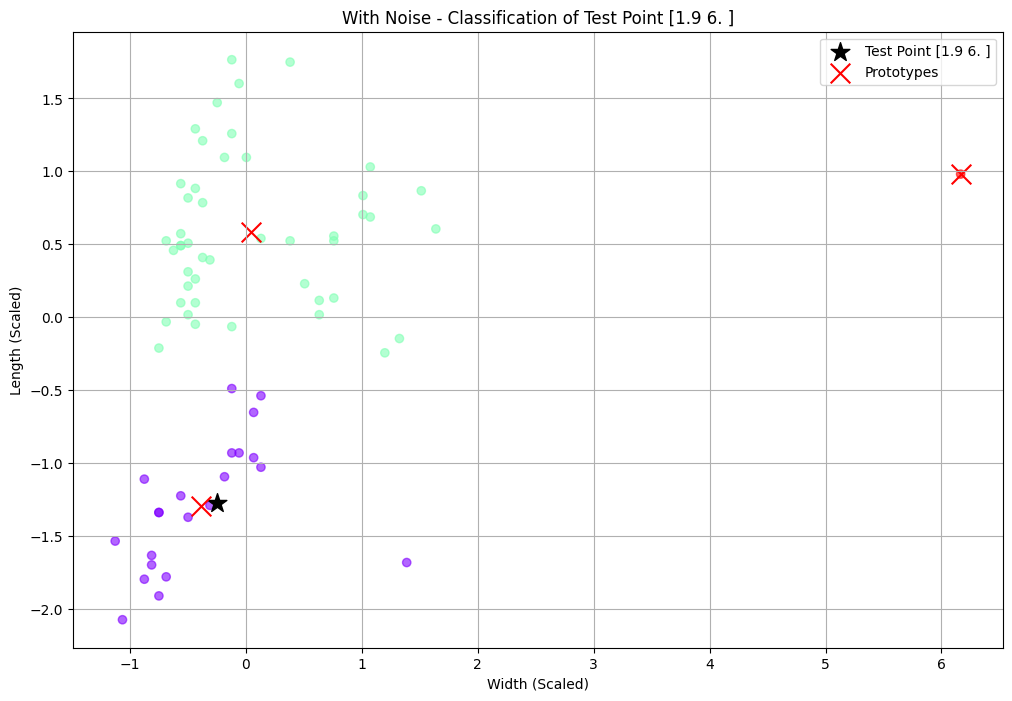

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import linkage, fcluster

def perform_classification_analysis(X_scaled, original_point, scaled_point, title_prefix="", n_clusters=3):
    # Perform hierarchical clustering
    linkage_matrix = linkage(X_scaled, method='ward')
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    def mle_classification(point, X, clusters):
        gaussian_params = []

        # Calculate parameters for each cluster
        for i in range(1, max(clusters) + 1):
            cluster_points = X[clusters == i]
            mean = np.mean(cluster_points, axis=0)

            # Handle single-point clusters
            if len(cluster_points) > 1:
                cov = np.cov(cluster_points.T)
            else:
                cov = np.eye(2) * 0.01

            # Calculate prior probability
            prior = len(cluster_points) / len(X)

            gaussian_params.append({
                'mean': mean,
                'cov': cov,
                'prior': prior
            })

        # Calculate likelihood for each cluster
        likelihoods = []
        for params in gaussian_params:
            rv = multivariate_normal(params['mean'], params['cov'])
            likelihood = rv.pdf(point) * params['prior']
            likelihoods.append(likelihood)

        return np.argmax(likelihoods) + 1, likelihoods

    def calculate_prototypes(X, clusters):
        prototypes = []
        for i in range(1, max(clusters) + 1):
            mask = clusters == i
            prototype = np.mean(X[mask], axis=0)
            prototypes.append(prototype)
        return np.array(prototypes)

    def hyperplane_classification(point, prototypes):
        distances = np.linalg.norm(prototypes - point, axis=1)
        return np.argmin(distances) + 1, distances

    def knn_classification(point, X, clusters, k=5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, clusters)

        distances, indices = knn.kneighbors([point])
        prediction = knn.predict([point])[0]
        neighbor_classes = clusters[indices[0]]

        return prediction, neighbor_classes, distances[0]

    # Calculate prototypes
    prototypes = calculate_prototypes(X_scaled, clusters)

    # Perform all three classifications
    print(f"\n{title_prefix} Classification of point {original_point}:")

    # 1. MLE Classification
    mle_cluster, mle_likelihoods = mle_classification(scaled_point, X_scaled, clusters)
    print("\n1. Maximum Likelihood Estimation (MLE) Method:")
    print(f"Classification: Cluster {mle_cluster}")
    print("Likelihoods for each cluster:")
    for i, likelihood in enumerate(mle_likelihoods):
        print(f"Cluster {i+1}: {likelihood:.6e}")

    # 2. Hyperplane Method
    hyperplane_cluster, distances = hyperplane_classification(scaled_point, prototypes)
    print("\n2. Hyperplane Method:")
    print(f"Classification: Cluster {hyperplane_cluster}")
    print("Distances to prototypes:")
    for i, distance in enumerate(distances):
        print(f"Distance to Cluster {i+1} prototype: {distance:.4f}")

    # 3. K-NN Classification
    k = 5
    knn_cluster, neighbor_classes, knn_distances = knn_classification(scaled_point, X_scaled, clusters, k)
    print(f"\n3. K-Nearest Neighbors Method (k={k}):")
    print(f"Classification: Cluster {knn_cluster}")
    print(f"Classes of {k} nearest neighbors: {neighbor_classes}")
    print(f"Distances to {k} nearest neighbors: {knn_distances}")

    # Visualize the classification
    plt.figure(figsize=(12, 8))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow', alpha=0.6)
    plt.scatter(scaled_point[0], scaled_point[1], color='black',
                marker='*', s=200, label=f'Test Point {original_point}')
    plt.scatter(prototypes[:, 0], prototypes[:, 1], color='red',
                marker='x', s=200, label='Prototypes')
    plt.xlabel('Width (Scaled)')
    plt.ylabel('Length (Scaled)')
    plt.title(f'{title_prefix} Classification of Test Point {original_point}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        'mle': (mle_cluster, mle_likelihoods),
        'hyperplane': (hyperplane_cluster, distances),
        'knn': (knn_cluster, neighbor_classes, knn_distances),
        'prototypes': prototypes,
        'clusters': clusters
    }

# Test point
test_point_original = np.array([1.9, 6])
test_point_scaled_no_noise = scaler.transform([test_point_original])[0]
test_point_scaled = scaler.transform([test_point_original])[0]

# Perform analysis for data without noise
results_no_noise = perform_classification_analysis(
    X_scaled_no_noise,
    test_point_original,
    test_point_scaled_no_noise,
    title_prefix="No Noise -"
)

# Perform analysis for data with noise
results_noise = perform_classification_analysis(
    X_scaled,
    test_point_original,
    test_point_scaled,
    title_prefix="With Noise -"
)